In [1]:
pwd

u'/Users/edlopez'

In [2]:
cd teaching

/Users/edlopez/teaching


In [3]:
cd GMU/CDS\ 292

/Users/edlopez/teaching/GMU/CDS 292


In [4]:
cd datasets/

/Users/edlopez/teaching/GMU/CDS 292/datasets


In [5]:
cd /Users/edlopez/teaching/GMU/CDS 292/text

/Users/edlopez/teaching/GMU/CDS 292/text


In [6]:
from readlist import readlist

In [90]:
cd ../datasets/

/Users/edlopez/teaching/GMU/CDS 292/datasets


In [8]:
E=readlist('email-Enron.txt',4)

In [14]:
import networkx as nx

In [151]:
nodelist=list(E.nodes())

In [76]:
import random as rn

In [154]:
nodelist[0]

'19554'

In [153]:
rn.shuffle(nodelist)

In [87]:
def infect(H,o,T,dur):
    import networkx as nx
    import random as rn
    from copy import deepcopy
    G=deepcopy(H)
    beeninfected={}
    timeInfected={}
    for i in G.nodes():
        beeninfected[i]=False
        timeInfected[i]=0
    beeninfected[o]=True
    A=[o]
    Rtime={}
    Reff={}
    EI={}
    S={}
    R={}
    I={}
    time=0
    EI[time]=1
    R[time]=0
    S[time]=G.order()-1
    I[time]=1
    while len(A)>0:
        newA=[]
        time=time+1
        EI[time]=EI[time-1]
        S[time]=S[time-1]
        R[time]=R[time-1]
        for i in A:
            timeInfected[i]=timeInfected[i]+1
            if timeInfected[i]==dur:
                R[time]=R[time]+1
            elif timeInfected[i]<dur:
                newA.append(i)
                I[time]=I.get(time,0)+1
                for j in G.neighbors(i):
                    if beeninfected[j]==False:
                        if rn.random()<=T:
                            Reff[i]=Reff.get(i,0.)+1
                            beeninfected[j]=True
                            timeInfected[j]=0
                            EI[time]=EI[time]+1
                            S[time]=S[time]-1
                            I[time]=I[time]+1
                            newA.append(j)                 
        RtimeStep=float(len(newA)-len(A))/len(A)
        Rtime[time]=RtimeStep
        A=newA
    Reffavg=0.
    for i in Reff.keys():
        Reffavg=Reffavg+Reff[i]
    if len(Reff)==0:
        Reffavg=0.
    else:
        Reffavg=Reffavg/len(Reff)
    OutDic={}
    OutDic['I']=I
    OutDic['EI']=EI
    OutDic['S']=S
    OutDic['R']=R
    OutDic['Rtime']=Rtime
    OutDic['Reff']=Reff
    OutDic['Reffavg']=Reffavg
    OutDic['time']=time
    return(OutDic)

In [13]:
import matplotlib.pyplot as plt

In [203]:
EpiE=infect(E,nodelist[0],0.05,14)

In [48]:
len(EpiE)

6

In [204]:
EpiE['time']

80

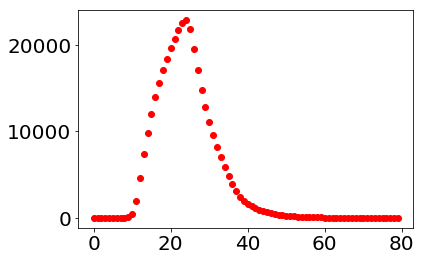

In [205]:
plt.plot(EpiE['I'].keys(),EpiE['I'].values(),'or')
#plt.plot(EpiE[1].keys(),Epi[1].values(),'ok')
#plt.plot(EpiE[2].keys(),EpiE[2].values(),'og')
#plt.plot(EpiE[3].keys(),EpiE[3].values(),'ob')

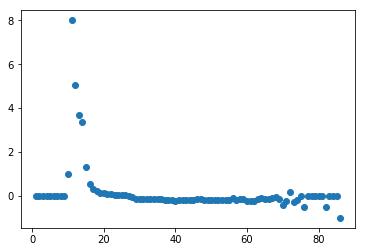

In [99]:
plt.plot(EpiE[4].keys(),EpiE[4].values(),'o')

In [91]:
C=readlist('ca-CondMat-noself.txt',4)

In [82]:
Cnodes=list(C.nodes())
rn.shuffle(Cnodes)
EpiC=infect(C,Cnodes[0],0.05,14)

In [208]:
EpiC['time']

102

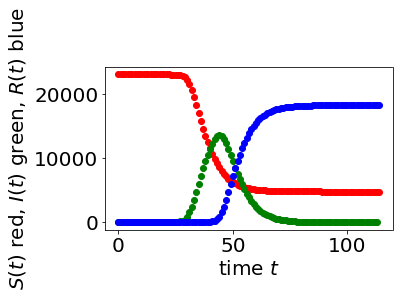

In [83]:
plt.rcParams.update({'font.size': 20})
plt.xlabel('time $t$')
plt.ylabel('$S(t)$ red, $I(t)$ green, $R(t)$ blue')
plt.plot(EpiC['S'].keys(),EpiC['S'].values(),'or')
#plt.plot(EpiC[1].keys(),EpiC[1].values(),'ok')
plt.plot(EpiC['I'].keys(),EpiC['I'].values(),'og')
plt.plot(EpiC['R'].keys(),EpiC['R'].values(),'ob')
plt.tight_layout()
plt.savefig('SIR-condmat-T005-D14-rea1.png')

In [84]:
plt.plot(EpiC[4].keys(),EpiC[4].values(),'o')

KeyError: 4

In [92]:
IR={}
ReffR={}
ReffiR={}
TotDurR={}
rn.shuffle(Cnodes)
print "patient zero:",Cnodes[0]
for r in range(100):
    Rl=infect(C,Cnodes[0],0.05,14)
    IR[r]=Rl['I']
    ReffR[r]=Rl['Reffavg']
    ReffiR[r]=Rl['Reff']
    TotDurR[r]=Rl['time']
    print r,Rl['time']
HReff=[]
for r in ReffiR:
    for i in ReffiR[r]:
        reff=ReffiR[r][i]
        HReff.append(reff)

patient zero: 100653
0 103
1 85
2 84
3 102
4 97
5 89
6 90
7 86
8 89
9 97
10 101
11 89
12 100
13 81
14 88
15 92
16 98
17 85
18 118
19 93
20 89
21 97
22 100
23 103
24 91
25 94
26 92
27 93
28 99
29 83
30 98
31 14
32 84
33 98
34 121
35 88
36 86
37 98
38 87
39 86
40 82
41 98
42 94
43 80
44 91
45 103
46 87
47 84
48 102
49 90
50 88
51 86
52 127
53 87
54 81
55 81
56 87
57 91
58 93
59 96
60 84
61 92
62 87
63 94
64 126
65 92
66 96
67 111
68 110
69 83
70 88
71 97
72 87
73 113
74 102
75 86
76 90
77 91
78 90
79 87
80 83
81 90
82 89
83 91
84 94
85 84
86 98
87 88
88 84
89 106
90 83
91 94
92 112
93 86
94 98
95 95
96 92
97 85
98 93
99 83


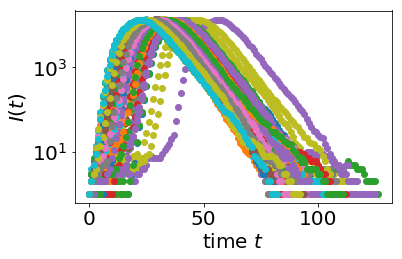

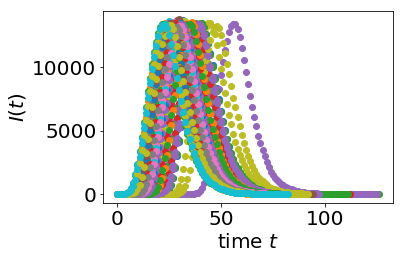

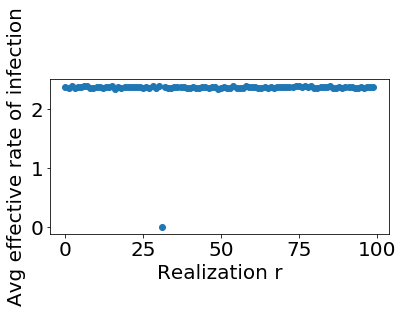

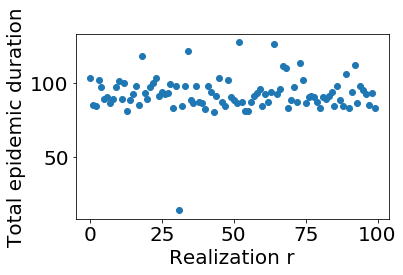

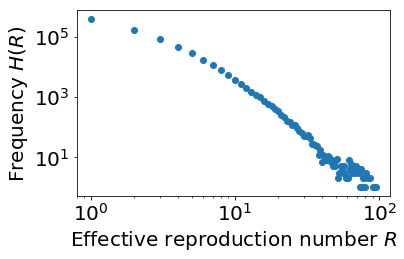

In [93]:
for r in IR.keys():
    plt.yscale('log')
    plt.plot(IR[r].keys(),IR[r].values(),'o')
plt.xlabel('time $t$')
plt.ylabel('$I(t)$')
plt.tight_layout()
plt.savefig('SIR-condmat-T005-D14-rea20-log.png')
plt.show()
for r in IR.keys():
    plt.plot(IR[r].keys(),IR[r].values(),'o')
plt.xlabel('time $t$')
plt.ylabel('$I(t)$')
plt.tight_layout()
plt.savefig('SIR-condmat-T005-D14-rea20-lin.png')
plt.show()
plt.plot(ReffR.keys(),ReffR.values(),'o')
plt.xlabel('Realization r')
plt.ylabel('Avg effective rate of infection')
plt.tight_layout()
plt.savefig('SIR-condmat-Reff-T005-D14-rea20.png')
plt.show()
plt.plot(TotDurR.keys(),TotDurR.values(),'o')
plt.xlabel('Realization r')
plt.ylabel('Total epidemic duration')
plt.tight_layout()
plt.savefig('SIR-condmat-EpiDur-T005-D14-rea20.png')
plt.show()
Hreff={}
for r in HReff:
    Hreff[r]=Hreff.get(r,0)+1
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Effective reproduction number $R$')
plt.ylabel('Frequency $H(R)$')
plt.plot(Hreff.keys(),Hreff.values(),'o')
plt.tight_layout()
plt.savefig('SIR-condmat-R-T005-D14-rea20.png')

In [94]:
def infectAndDistance(H,o,x,T,dur):
    import networkx as nx
    import random as rn
    from copy import deepcopy
    G=deepcopy(H)
    beeninfected={}
    timeInfected={}
    for i in G.nodes():
        beeninfected[i]=False
        timeInfected[i]=0
    beeninfected[o]=True
    A=[o]
    Rtime={}
    Reff={}
    EI={}
    S={}
    R={}
    I={}
    time=0
    EI[time]=1
    R[time]=0
    S[time]=G.order()-1
    I[time]=1
    edges=list(G.edges())
    for (i,j) in edges:
        if rn.random()<x:
            G.remove_edge(i,j)
    while len(A)>0:
        newA=[]
        time=time+1
        EI[time]=EI[time-1]
        S[time]=S[time-1]
        R[time]=R[time-1]
        for i in A:
            timeInfected[i]=timeInfected[i]+1
            if timeInfected[i]==dur:
                R[time]=R[time]+1
            elif timeInfected[i]<dur:
                newA.append(i)
                I[time]=I.get(time,0)+1
                for j in G.neighbors(i):
                    if beeninfected[j]==False:
                        if rn.random()<=T:
                            Reff[i]=Reff.get(i,0.)+1
                            beeninfected[j]=True
                            timeInfected[j]=0
                            EI[time]=EI[time]+1
                            S[time]=S[time]-1
                            I[time]=I[time]+1
                            newA.append(j)                 
        RtimeStep=float(len(newA)-len(A))/len(A)
        Rtime[time]=RtimeStep
        A=newA
    Reffavg=0.
    for i in Reff.keys():
        Reffavg=Reffavg+Reff[i]
    if len(Reff)==0:
        Reffavg=0.
    else:
        Reffavg=Reffavg/len(Reff)
    OutDic={}
    OutDic['I']=I
    OutDic['EI']=EI
    OutDic['S']=S
    OutDic['R']=R
    OutDic['Rtime']=Rtime
    OutDic['Reff']=Reff
    OutDic['Reffavg']=Reffavg
    OutDic['time']=time
    return(OutDic)

In [95]:
Out1=infectAndDistance(C,'18985',0.,0.05,14)

In [96]:
Out2=infectAndDistance(C,'18985',0.4,0.05,14)

In [107]:
Out3=infectAndDistance(C,'18985',0.5,0.05,14)

In [120]:
Out4=infectAndDistance(C,'18985',0.6,0.05,14)

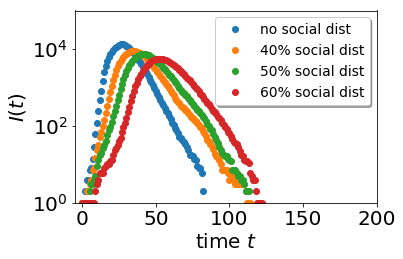

In [127]:
fig,ax=plt.subplots()
plt.yscale('log')
plt.xlabel('time $t$')
plt.ylabel('$I(t)$')
plt.xlim(-5,200)
plt.ylim(1,100000)
ax.plot(Out1['I'].keys(),Out1['I'].values(),'o',label="no social dist")
ax.plot(Out2['I'].keys(),Out2['I'].values(),'o',label="40% social dist")
ax.plot(Out3['I'].keys(),Out3['I'].values(),'o',label="50% social dist")
ax.plot(Out4['I'].keys(),Out4['I'].values(),'o',label="60% social dist")
legend = ax.legend(loc='upper right', shadow=True,fontsize='x-small')
plt.tight_layout()
plt.savefig('SIR-condmat-I-SD-0_04_05_T005-D14-rea1.png')

In [109]:
def infectAndDistancev2(H,o,x,T,dur):
    import networkx as nx
    import random as rn
    from copy import deepcopy
    G=deepcopy(H)
    beeninfected={}
    timeInfected={}
    for i in G.nodes():
        beeninfected[i]=False
    beeninfected[o]=True
    A=[o]
    Rtime={}
    Reff={}
    EI={}
    S={}
    R={}
    I={}
    time=0
    timeInfected[o]=time
    EI[time]=1
    R[time]=0
    S[time]=G.order()-1
    I[time]=1
    edges=list(G.edges())
    for (i,j) in edges:
        if rn.random()<x:
            G.remove_edge(i,j)
    while len(A)>0:
        newA=[]
        time=time+1
        EI[time]=EI[time-1]
        S[time]=S[time-1]
        R[time]=R[time-1]
        for i in A:
            if time-timeInfected[i]==dur:
                R[time]=R[time]+1
            elif time-timeInfected[i]<dur:
                newA.append(i)
                I[time]=I.get(time,0)+1
                for j in G.neighbors(i):
                    if beeninfected[j]==False:
                        if rn.random()<=T:
                            Reff[i]=Reff.get(i,0.)+1
                            beeninfected[j]=True
                            timeInfected[j]=time
                            EI[time]=EI[time]+1
                            S[time]=S[time]-1
                            I[time]=I[time]+1
                            newA.append(j)                 
        RtimeStep=float(len(newA)-len(A))/len(A)
        Rtime[time]=RtimeStep
        A=newA
    Reffavg=0.
    for i in Reff.keys():
        Reffavg=Reffavg+Reff[i]
    if len(Reff)==0:
        Reffavg=0.
    else:
        Reffavg=Reffavg/len(Reff)
    OutDic={}
    OutDic['I']=I
    OutDic['EI']=EI
    OutDic['S']=S
    OutDic['R']=R
    OutDic['Rtime']=Rtime
    OutDic['Reff']=Reff
    OutDic['Reffavg']=Reffavg
    OutDic['time']=time
    OutDic['timeInfected']=timeInfected
    return(OutDic)

In [110]:
Out1v2=infectAndDistancev2(C,'18985',0.,0.05,14)

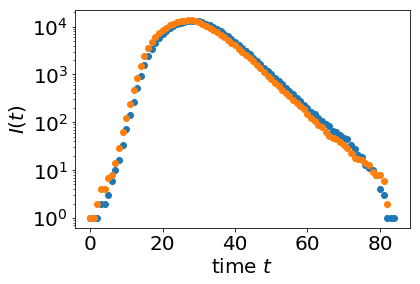

In [111]:
plt.yscale('log')
plt.xlabel('time $t$')
plt.ylabel('$I(t)$')
plt.plot(Out1v2['I'].keys(),Out1v2['I'].values(),'o',label="no social dist")
plt.plot(Out1['I'].keys(),Out1['I'].values(),'o',label="no social dist")

In [67]:
pwd

u'/Users/edlopez/teaching/GMU/CDS 292/datasets'

In [68]:
cd ../text

/Users/edlopez/teaching/GMU/CDS 292/text


In [69]:
from BFS import *

In [70]:
s=BFS(C,'18985')

In [112]:
T1=infectAndDistancev2(C,'18985',0.,1.,14)

In [113]:
Hs={}
for l in s.values():
    Hs[l]=Hs.get(l,0)+1

In [114]:
Ht={}
for i in T1['timeInfected']:
    t=T1['timeInfected'][i]
    Ht[t]=Ht.get(t,0)+1

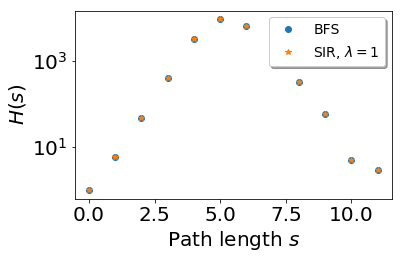

In [130]:
fig,ax=plt.subplots()
plt.yscale('log')
plt.xlabel('Path length $s$')
plt.ylabel('$H(s)$')
ax.plot(Hs.keys(),Hs.values(),'o',label='BFS')
ax.plot(Ht.keys(),Ht.values(),'*',label='SIR, $\lambda=1$')
legend = ax.legend(loc='upper right', shadow=True,fontsize='x-small')
plt.tight_layout()
plt.savefig('BFS-and-SIR-T1-condmat.png')